In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The Y-coordinate corresponding to the given X-coordinate is: 15
The Y-coordinate corresponding to the given X-coordinate is: 14
The Y-coordinate corresponding to the given X-coordinate is: 21
The range of P is: 10 to 20
The range of Pi is: 10 to 20
The range of Pe is: 20 to 30


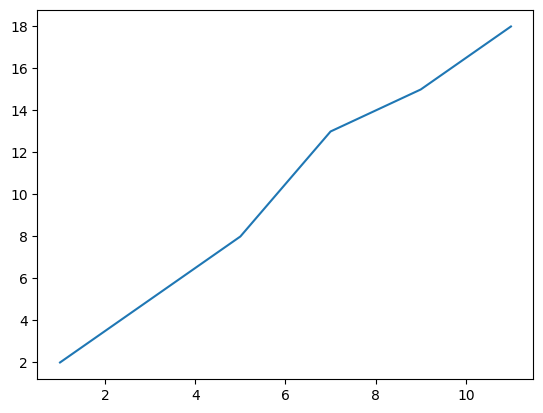

In [3]:
# 1. Plot line

X = [1,3,5,7,9,11]
Y = [2,5,8,13,15,18]

## POINT PRESENT IN THE DATA
# X = 9

P = Y[X.index(9)] 
# index() function gives the index/position of the coordinate that is passed through it. In this case, 4.
# Then, the resulting position was passed in the Y list to find the corresponding Y-coordinate.
print("The Y-coordinate corresponding to the given X-coordinate is:", P)

## POINT NOT IN THE DATA BUT PRESENT IN THE GRAPH
# X = 8

Pi = np.interp(8, X, Y) 
# interp() is a function in the numpy library used for interpolation of a line.
# Pass the point you want answer for, the list the point is present in, and the list from which you want the answer, 
# i.e., the Y-coordinate.
print("The Y-coordinate corresponding to the given X-coordinate is:", int(Pi))

## POINT ABSENT FROM BOTH THE GRAPH AND THE DATA
# X = 13

coeff = np.polyfit(X,Y,1)
# A line is represented in maths as y = mx + c where m is the slope and c is the constant or the shift from the X-axis.
# polyfit() provides the m(slope) and c(constant) of the line.
poly = np.poly1d(coeff)
# poly1d() provides takes those coefficients to make a polynomial line. In this case, Y = 0.9X + 2.9.
Pe = poly(13)
# Now, you just provide the line the X-coordinate to find the Y-coordinate.
print("The Y-coordinate corresponding to the given X-coordinate is:", int(Pe))

# Now, to find the lower and upper limit, we just floor divide the answer by 10 and multiply it by 10 for the lower limit
# and add 1 to the floor division for the upper limit.

lower_limit = (P // 10) * 10
lower_limit_i = (Pi // 10) * 10
lower_limit_e = (Pe // 10) * 10

upper_limit = ((P // 10) + 1) * 10
upper_limit_i = ((Pi // 10) + 1) * 10
upper_limit_e = ((Pe // 10) + 1) * 10

print("The range of P is:", lower_limit, "to", upper_limit)
print("The range of Pi is:", int(lower_limit_i), "to", int(upper_limit_i))
print("The range of Pe is:", int(lower_limit_e), "to", int(upper_limit_e))

plt.plot(X,Y)
plt.show()

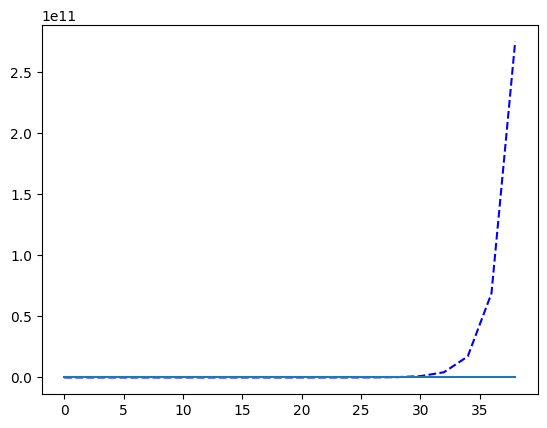

30


In [4]:
# 2. Matplotlib increase

x = np.arange(0,40,2) # arange() function used to generate a sequence of number.
y = 2**x
plt.plot(x, y, "b--")
plt.plot(x,x)
plt.show()

# From the graph plotted below, we can see that the value of x from where there is a slight increase in value of y is 30.
# Therefore,
print(30)

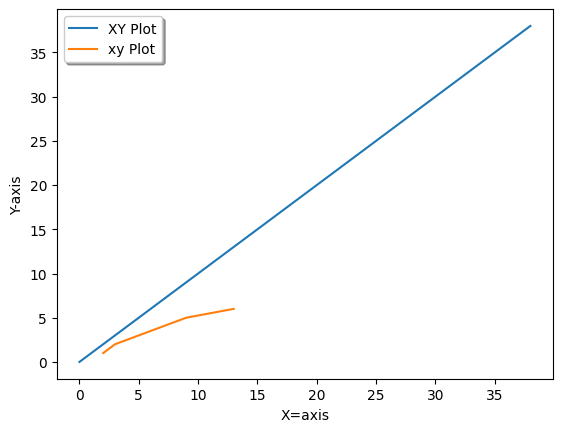

In [5]:
# 3. Plot Graphs

x = [2,3,5,7,9,13]
y = [1,2,3,4,5,6]
X = np.arange(0,40,2)
Y = X
plt.plot(X,Y, label = "XY Plot")
plt.plot(x,y, label = "xy Plot")
plt.xlabel("X=axis")
plt.ylabel("Y-axis")
plt.legend(shadow = True) # shadow is an argument to add depth to the legend.
plt.show()

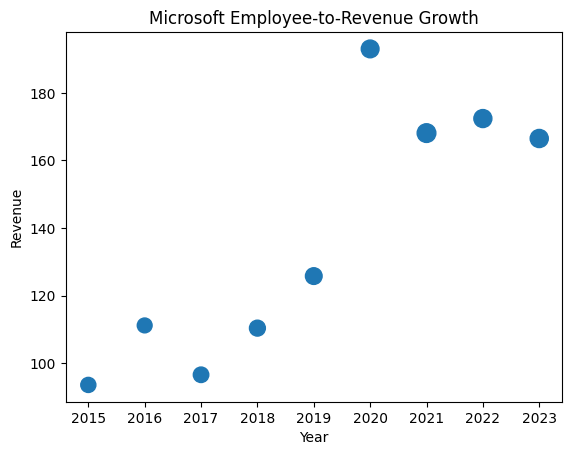

2020 193 163
2022 172.4 168


In [6]:
# 4. Microsoft Bubble

revenue = [93.6, 111.2, 96.6, 110.4, 125.8, 193, 168.1, 172.4, 166.5]
employees = [118, 114, 124, 131, 144, 163, 181, 168, 170]
year = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
plt.scatter(year, revenue, s = employees)
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.title("Microsoft Employee-to-Revenue Growth")

drastic = []
drastic_values = []
for i in range(1, len(year) - 1):
    if revenue[i] > revenue[i-1] and revenue[i] > revenue[i+1]:
        drastic.append((year[i], revenue[i], employees[i]))
        drastic_values.append((year[i], (revenue[i] - revenue[i-1]) + (revenue[i] - revenue[i+1]), employees[i]))

final = sorted(drastic, key = lambda x : x[1], reverse = True)[:2]
plt.show()
for i in range(len(final)):
    print(final[i][0], final[i][1], final[i][2])

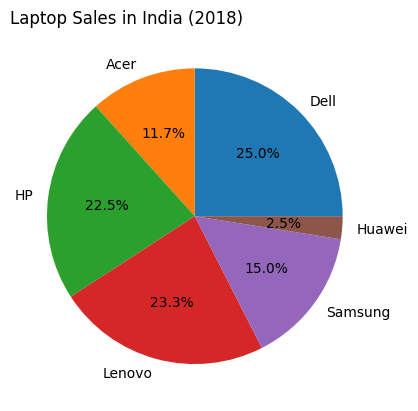

Dell       25.0      
Acer       11.7      
HP         22.5      
Lenovo     23.3      
Samsung    15.0      
Huawei     2.5       


In [7]:
# 5. Laptop Sales

laptop = ["Dell", "Acer", "HP", "Lenovo", "Samsung", "Huawei"]
sales = [1500, 700, 1350, 1400, 900, 150]
plt.pie(sales, labels = laptop, autopct = "%.1f%%")
plt.title("Laptop Sales in India (2018)", loc = "left")
plt.show()

sum = 0
for i in range(len(sales)):
    sum += sales[i]

for laptop, sales in zip(laptop, sales): # This zip function just zips together 2 different data like lists.
    print(f"{laptop:<10} {round((sales/sum)*100, 1):<10}")

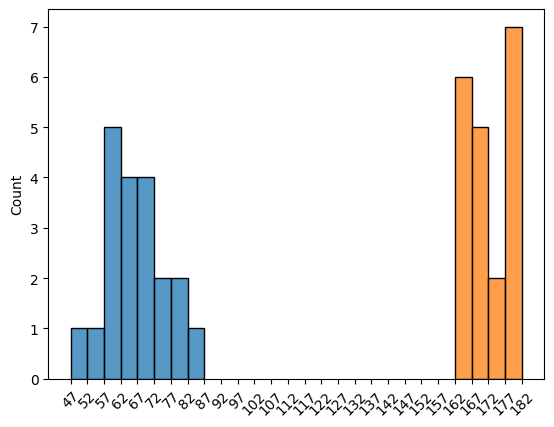

57.0 177.0


In [16]:
# 6. Students data 

# RANDOM LISTS FOR HEIGHT AND WEIGHT
height = [169, 170, 172, 180, 179, 177, 168, 180, 182, 179, 162, 166, 165, 166, 170, 169, 179, 172, 164, 165]
weight = [65, 87, 66, 62, 68, 67, 55, 59, 57, 60, 62, 71, 73, 74, 77, 79, 57, 58, 47, 69]

# TO FIND HOW MANY NUMBER OF BINS SHOULD BE PLOTTED TO MAKE RANGES / BIN SIZE OF 5.
# Sidhi baat ye ki kitne number of intervals(bars) banenge if range difference 5 ho to e.g., 160-165.
# Graph me dekhoge to 47 to 52 ek bar(bin) bana.
binsw = (max(weight) - min(weight))//5
binsh = (max(height) - min(height))//5

# Ye xticks hai meaning x-axis ko fill kiya hai humne.
# Without this, we lack the information ki bins ki ranges kya hai. 
# For e.g., without them, we won't be able to know ki pehla bin / bar kis range se kaha tak ka hai.
xt = np.arange(min(weight), max(height) + 5, 5)
plt.xticks(xt, rotation = 45)

# Plotting
sns.histplot(weight, bins = binsw)
sns.histplot(height, bins = binsh)
plt.show()

# To find the bin with the maximum frequency, we use this function to get:
#  1. w_counts => The count of each bin (The values on Y-axis)
#  2. W_edges => The range of the bin (52-57, 57-62 etc.)
w_counts, w_edges = np.histogram(weight, binsw)
h_counts, h_edges = np.histogram(height, binsh)

# Using argmax() to find the maximum count and then using it find the lower limit of the range.
max_w = np.argmax(w_counts)
w_limit = w_edges[max_w]
max_h = np.argmax(h_counts)
h_limit = h_edges[max_h]

print(w_limit, h_limit)